# Pymaceuticals Inc.
---

### Analysis

- While all drugs showed some promise in treating tumors in the subject mice, two drugs stood out as being the most effective. Capomulin and Ramicane treatments both had the lowest average tumor volume of the subject mice. Weight also seemed to be a factor that determined how effective treatments were. The treatments showed to be generally less effective in heavier mice. A conclusion could be made that either Capomulin or Ramicane in conjuction with a "healthy" weight are the best treatment options for tumors in mice in this study.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from pathlib import Path
from scipy.stats import sem
import numpy as np

# Study data files
mouse_metadata_path = Path("Mouse_metadata.csv")
study_results_path = Path("Study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(study_results,mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
no_of_mice = len(combined_df["Mouse ID"].unique())
print(no_of_mice)

249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicate_ID = combined_df.loc[combined_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
print(duplicate_ID)

['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = combined_df.loc[combined_df["Mouse ID"]=="g989"]
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combined_df.loc[combined_df["Mouse ID"]!="g989"]
cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_count = len(cleaned_df["Mouse ID"].unique())
mouse_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_mean = cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
tumor_median = cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
tumor_variance = cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
tumor_std = cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
tumor_sem = cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({"Mean Tumor Volume": tumor_mean,
                          "Median Tumor Volume": tumor_median,
                          "Tumor Volume Variance": tumor_variance,
                          "Tumor Volume Std. Dev.": tumor_std,
                          "Tumor Volume Std. Err.": tumor_sem})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
aggregate_df_groupby = cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"]
# Using the aggregation method, produce the same summary statistics in a single line
aggregate_df = aggregate_df_groupby.agg(["mean", "median", "var", "std", "sem"])
aggregate_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

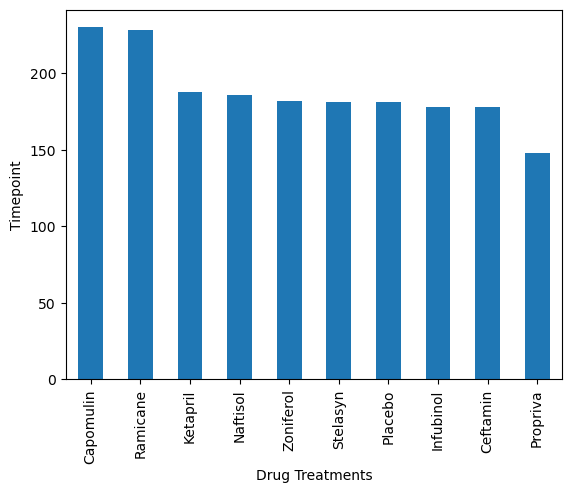

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#make df with these two columns
drug_timepoint_df = cleaned_df[["Drug Regimen", "Timepoint"]]
x = drug_timepoint_df["Drug Regimen"].value_counts()
x.plot(kind="bar", align="center")
plt.ylabel("Timepoint")
plt.xlabel("Drug Treatments")
plt.show()

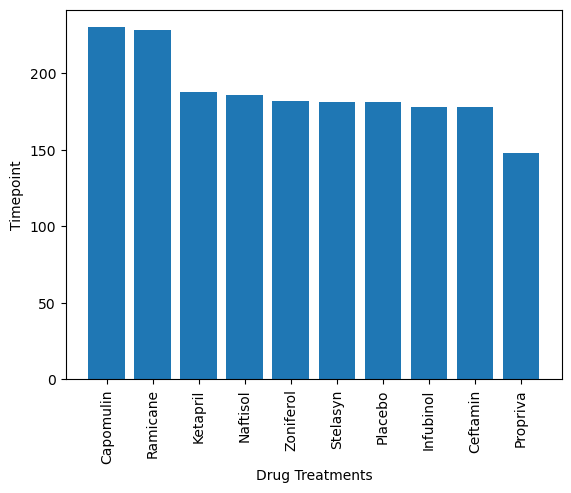

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
#ID_timepoint_df = cleaned_df[["Drug Regimen", "Timepoint"]]
plt.bar(x.index, x.values)
plt.ylabel("Timepoint")
plt.xlabel("Drug Treatments")
plt.xticks(rotation="vertical")
plt.show()

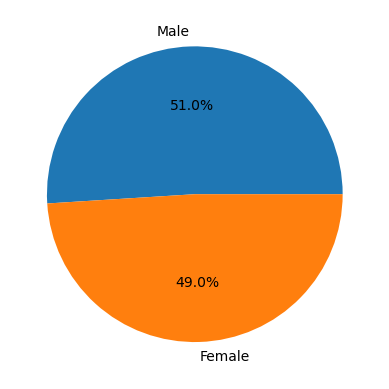

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_avgs = cleaned_df.value_counts((["Sex"]) ,["Male"] ,["Female"])*100
sizes = [51, 49]
labels = ["Male", "Female"]
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.show()

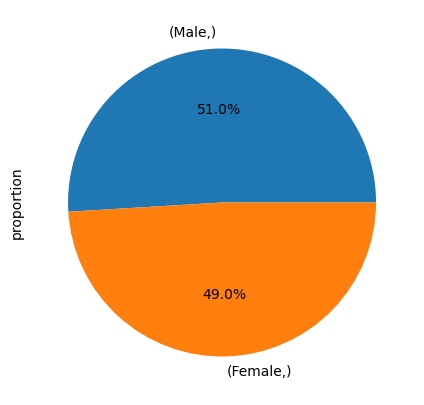

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_avgs.plot(kind="pie", figsize=(10,5), autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_volumes = cleaned_df.groupby(["Mouse ID"])["Timepoint"].max()
final_volumes = final_volumes.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

merged_df = final_volumes.merge(cleaned_df, on=["Mouse ID", "Timepoint"], how="left")

In [18]:
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drugs_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs_list:
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_data = merged_df.loc[merged_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(tumor_data)
    
    # Determine outliers using upper and lower bounds
    quartiles =  tumor_data.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq - (1.5 * iqr)
    print(f"Values below{lower_bound} or above {upper_bound} could be outliers from {drug} information.")


Values below20.70456164999999 or above 28.486425109999995 could be outliers from Capomulin information.
Values below17.912664470000003 or above 27.01120119 could be outliers from Ramicane information.
Values below36.83290494999999 or above 48.310040109999996 could be outliers from Infubinol information.
Values below25.355449580000002 or above 40.93320176 could be outliers from Ceftamin information.


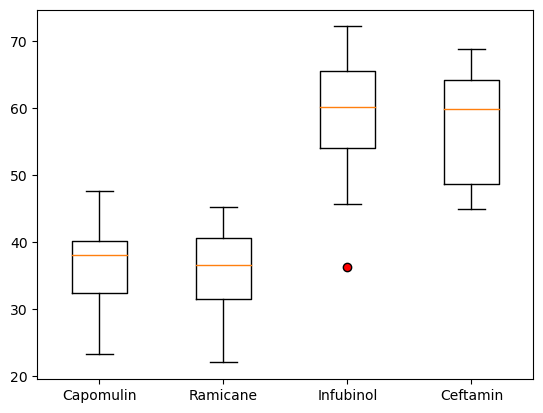

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels=drugs_list, flierprops={"markerfacecolor":"red"})
plt.show()

## Line and Scatter Plots

In [22]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
timepoint = merged_df["Timepoint"]
tumor_vol = merged_df.loc[merged_df["Mouse ID"]==1509, ["Drug Regimen"]=="Capomulin"]
plt.plot(timepoint, tumor_vol)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

KeyError: 'False: boolean label can not be used without a boolean index'

ValueError: x and y must be the same size

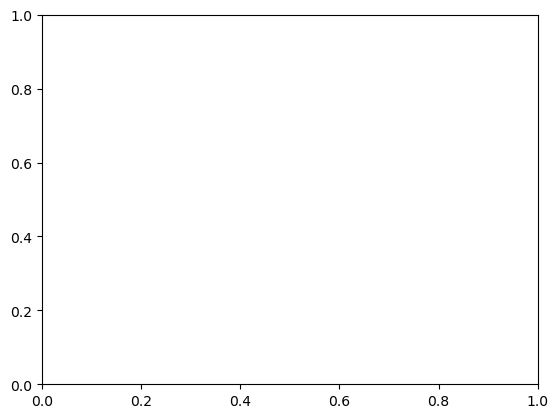

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.scatter(merged_df["Weight (g)"], ["Drug Regimen"] == "Capomulin")
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = cleaned_df(Weight (g), Tumor Volume (mm3))
print(f"The correlation coefficient between mouse weight and tumor volume is {cleaned_df(Weight (g), Tumor Volume (mm3))})

In [ ]:
x_values = cleaned_df["Weight (g)"]
y_values = cleaned_df["Tumor Volume (mm3)"]
regress_values = x_values + slope + intercept